# customer churn

### biznesda uchraydigan eng dolzarb muammolardan biri bu mijoz noroziligini aniqlash

### online dokon haridorlari malumotlarini tahlil qilish orqali mijozning qolish qolmasligini bashorat qilishimiz mumkin 

## bu bizda binary classificationga togri keladi chunki mijoz qoladi yoki yoqligini aniqlashimiz kerak

# kutubxonalar

In [72]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import sklearn 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# new library
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

# data

In [24]:
df = pd.read_csv('Churn_Modelling.csv')

# data haqida malumotlar

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [26]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [27]:
df.rename(columns={"Exited":"Churned"},inplace=True)

In [28]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# vizualization

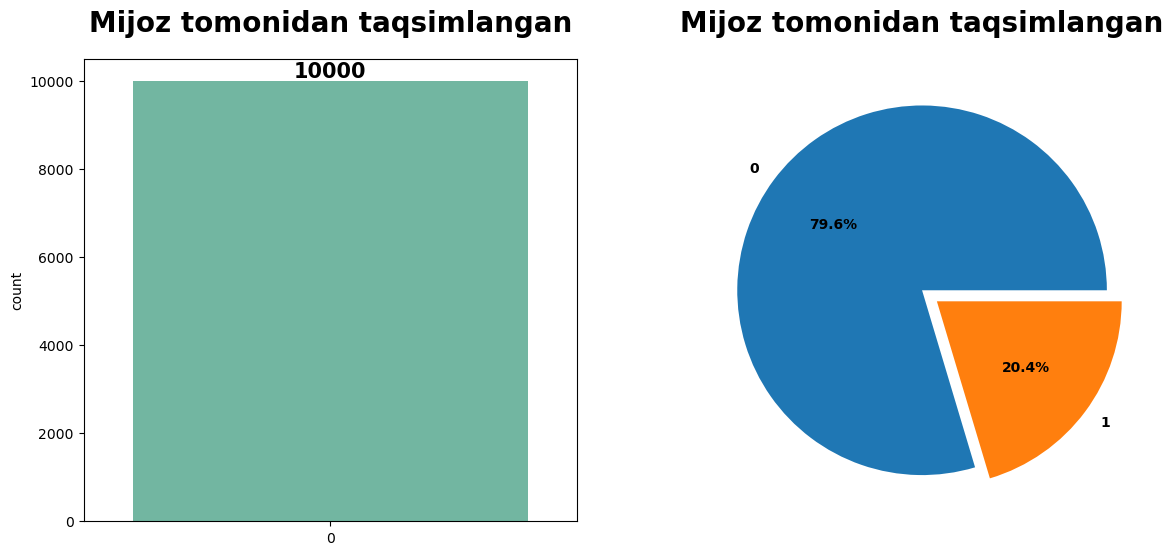

In [29]:
count = df["Churned"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(df["Churned"],palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Mijoz tomonidan taqsimlangan",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Mijoz tomonidan taqsimlangan",fontweight="black",size=20,pad=20)
plt.show()

# ML

In [30]:
df = pd.get_dummies(data=df)

In [31]:
X = df.drop('Churned', axis=1)
y = df['Churned']

In [66]:
X

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,0,0,0,0,0,1,0,0,1,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,1,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,0,0,0,0,0,1,0,0,1,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,0,0,0,0,0,1,0,0,1,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,...,0,0,0,0,0,1,0,0,0,1
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,...,0,0,0,0,0,1,0,0,0,1
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,...,0,0,0,0,0,1,0,0,1,0
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,...,0,0,0,0,0,0,1,0,0,1


In [32]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [56]:
forest_clf = RandomForestClassifier()
forest_clf.fit(x_train,y_train)

RandomForestClassifier()

# modelni baholash

In [57]:
y_pred = forest_clf.predict(x_test)

In [58]:
print(classification_report(y_test,y_pred))
print('accuracy_score: ',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1595
           1       0.83      0.39      0.53       405

    accuracy                           0.86      2000
   macro avg       0.85      0.68      0.72      2000
weighted avg       0.86      0.86      0.84      2000

accuracy_score:  0.8595


In [59]:
param_grid = {'max_depth': [3,4,5,6],
              'min_samples_split':[3,4,5,6],
              'min_samples_leaf': [3,4,5,6],
              'n_estimators': [50,90,100],
              'criterion': ['gini', 'entropy']}

In [60]:
grid_search = GridSearchCV(forest_clf, param_grid, cv=3, n_jobs=1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [50, 90, 100]})

In [61]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 50}

In [62]:
grid_search.score(x_train,y_train)

0.796

# jaccard index

In [63]:
jaccard_score(y_test,y_pred)

0.35697940503432496

# confusion matrix

<Axes: >

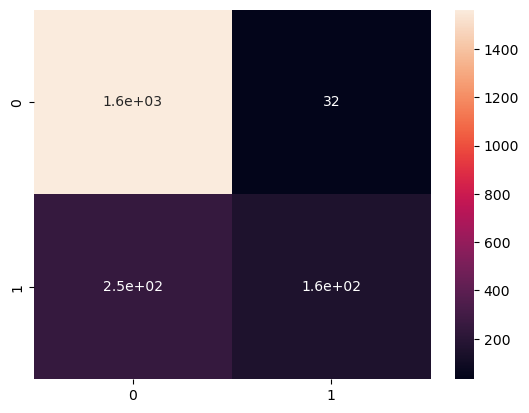

In [64]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

# cross validation

In [67]:
predic = cross_val_predict(estimator=forest_clf, X=X, y=y, cv=5)

In [69]:
df['Churned'].value_counts()

0    7963
1    2037
Name: Churned, dtype: int64

In [68]:
print(classification_report(y, predic))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      7963
           1       0.74      0.37      0.49      2037

    accuracy                           0.84     10000
   macro avg       0.80      0.67      0.70     10000
weighted avg       0.83      0.84      0.82     10000



In [70]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
print(f"precision_score: {precision_score(y_test,y_pred)}")
print(f"recall_score: {recall_score(y_test,y_pred)}")
print(f"f1_score: {f1_score(y_test,y_pred)}")
print(f"accuracy_score: {accuracy_score(y_test,y_pred)}")

precision_score: 0.8297872340425532
recall_score: 0.3851851851851852
f1_score: 0.5261382799325465
accuracy_score: 0.8595


## ROC curve

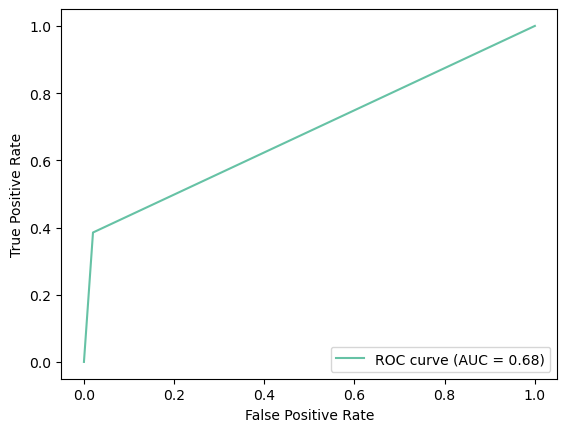

In [73]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# deep learning

### Avval biz Kerasga qaysi turdagi modelni ishlatmoqchi ekanligimizni aytamiz. Ko'pincha siz ketma-ket modellardan foydalanasiz.

In [35]:
# model = Sequential()

Keyinchalik, avval kirish qatlamini qurishga ruxsat bering. Diagrammadagi qizil qatlam. Bu erda e'tiborga olish kerak bo'lgan bir nechta narsa bor.

Biz ushbu NN davomida zich qatlamlardan foydalanmoqdamiz, men turli qatlamlar va neyron tarmoqlar o'rtasidagi farqlarga kirmayman, lekin ko'pincha siz zich yoki LSTM qatlamlaridan foydalanasiz. Batafsil maʼlumot bu yerda.

Birinchi raqam - 16 - tugunlar soni (yoki yuqoridagi diagrammadagi doiralar. Biz 16 dan boshlaymiz, bu bizning aniqligimizga qanday ta'sir qilishini ko'rish uchun keyinroq o'zgartirishimiz mumkin.

Input_dim argumentini o'rnatishingiz muhim, u bizning X_train ma'lumotlar to'plamidagi ustunlar miqdoriga mos kelishi kerak. Biz oddiygina ma'lumotlar to'plamidagi ustunlarni sanashimiz va uni quyida qilganimdek yozishimiz mumkin - lekin haqiqatda siz qiymatni avtomatik ravishda hisoblash uchun X_train.shape[1] dan foydalanishni xohlaysiz.

Faollashtirish funktsiyalari - bularni bir nuqtada o'qib chiqishingiz kerak - bular haqida yana bir post yozsangiz kerak, lekin hozircha shuni bilingki, bizning qatlamlarimiz chiqish qatlamidan tashqari barchasi "Relu" dan foydalanadi (bu haqda keyinroq to'xtalamiz. Umumiy qoida sifatida - "agar ishonchingiz komil bo'lmasa, relu dan foydalaning"

In [36]:
# model.add(Dense(16, input_dim=46, activation='relu', kernel_constraint=maxnorm(3)))

Biz Dropout Layerga qo'shamiz. Chiqib ketish qatlami biz neyron tarmoq orqali har safar takrorlanganda ma'lumotlarning belgilangan foizini (bu holda 0,2 yoki 20%) olib tashlashimizni ta'minlaydi. Bu ixtiyoriy, lekin uni haddan tashqari moslashtirmaslik uchun kodingizga kiritishga arziydi. Aniqroq bo'lishga harakat qilish uchun turli xil tashlab ketish stavkalarini o'zgartirishingiz mumkin.v

In [37]:
# model.add(Dropout(rate=0.2))

Endi biz yashirin qatlam deb ataladigan narsani qo'shamiz, bizda xohlagancha ko'p bo'lishi mumkin, ammo ko'p sonli yashirin qatlamlar bilan NN ning ishlashi uchun zarur bo'lgan qo'shimcha hisoblash quvvati haqida o'ylashga arziydi.

"kernal_constraint" argumentiga e'tibor bering? Bu "tushirish" qatlamlarining samarali ishlashi uchun zarur bo'lgan og'irliklarni o'lchash bilan bog'liq. Hujjatlarda yana ko'proq ma'lumot bor, lekin menimcha, siz bilishingiz kerak bo'lgan narsa shundaki, NN tabiatan ma'lumotlar to'plamidagi o'zgaruvchilarning barcha turli og'irliklarini avtomatik ravishda sinab ko'radi va xato qiladi (shuning uchun biz birinchi navbatda neyron tarmog'idan foydalanamiz). , kernel_constraint argumenti ushbu jarayon atrofida nazoratni qo'shadi.

In [38]:
# model.add(Dense(8, activation='relu', kernel_constraint=maxnorm(3)))

Haddan tashqari mos kelmaslik uchun boshqa Dropout qatlamini qo'shing.

In [39]:
# model.add(Dropout(rate=0.2))

Nihoyat, biz chiqish qatlamini qo'shamiz: bu bizning neyron tarmog'imizdan yakuniy natijani belgilaydi. Bu erda bir nechta narsalarni yodda tutish kerak:

Bizning birinchi argumentimiz 1-raqamdir. Buning sababi shundaki, bizning NN dan bitta ustunda mijozimiz ishlamay qoladimi yoki yo'qligini ko'rsatadigan indikator mavjud.
Faollashtirish funktsiyasi boshqacha. Yagona (ha/yo'q) tasniflash modeli uchun biz "sigmoid" dan foydalanamiz, masalan, bir nechta natijalarni tasniflaydigan tarmoq qurayotgan bo'lsak (masalan, mijozlarni muayyan guruhlarga guruhlash) biz "softmax" dan foydalanishimiz mumkin. faollashtirish funktsiyasi.

In [40]:
# model.add(Dense(1, activation='sigmoid'))

In [44]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

In [45]:
model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(x_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax"),
])

In [46]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               1509376   
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 64)               

In [47]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [52]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=128)

Epoch 1/30
63/63 [==============================] - 1s 14ms/step - loss: 280.2813 - accuracy: 0.6722 - val_loss: 500.9656 - val_accuracy: 0.7975
Epoch 2/30
63/63 [==============================] - 1s 13ms/step - loss: 268.7655 - accuracy: 0.6751 - val_loss: 324.4648 - val_accuracy: 0.7975
Epoch 3/30
63/63 [==============================] - 1s 13ms/step - loss: 245.1434 - accuracy: 0.6801 - val_loss: 482.5468 - val_accuracy: 0.7975
Epoch 4/30
63/63 [==============================] - 1s 12ms/step - loss: 199.2504 - accuracy: 0.6765 - val_loss: 330.7578 - val_accuracy: 0.7975
Epoch 5/30
63/63 [==============================] - 1s 12ms/step - loss: 178.5129 - accuracy: 0.6850 - val_loss: 355.8210 - val_accuracy: 0.7975
Epoch 6/30
63/63 [==============================] - 1s 12ms/step - loss: 177.3232 - accuracy: 0.6750 - val_loss: 410.5547 - val_accuracy: 0.7975
Epoch 7/30
63/63 [==============================] - 1s 12ms/step - loss: 147.0989 - accuracy: 0.6724 - val_loss: 164.4357 - val_ac

In [53]:
_, accuracy = model.evaluate(x_test, y_test, batch_size=128)

16/16 [==============================] - 0s 5ms/step - loss: 3.2330 - accuracy: 0.7975


In [54]:
print("Accuracy:",accuracy*100)

Accuracy: 79.75000143051147


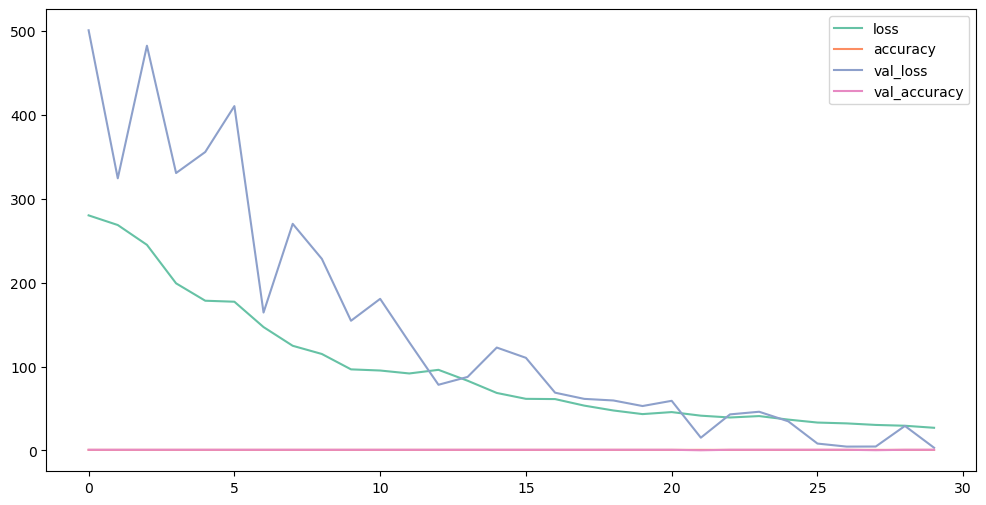

In [55]:
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.show()